# Linear Regression from Scratch with NumPy

First step: generate and visualise synthetic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Make Plots display inside the notebook
%matplotlib inline

# For reproducible "random" numbers
np.random.seed(42)

In [2]:
# Number of data points

n_samples = 100 

# Input values: 100 points between 0 and 10
x = np.linspace(0,10, n_samples) # shape (100,)

# True underlying relationship we will use: y = 3x + 7 + noise
true_w = 3.0
true_b = 7.0

# Random noise (normal distribution, mean 0, standard deviation 2)
noise = np.random.randn(n_samples) * 2

# Output values
y = true_w * x + true_b + noise # shape (100,)

print('x shape:', x.shape)
print('y shape:', y.shape)

x shape: (100,)
y shape: (100,)


# Reshape data + write a predict function 

- X with shape (n_samples, n_feactures)
- y with shape (n_samples, 1)

In [3]:
# Reshape x and y into 2D column vectors
X = x[:, np.newaxis] # shape (100, 1)
y = y[:, np.newaxis] # shape (100, 1)

print('X shape:', X.shape)
print('Y shape:', y.shape)

X shape: (100, 1)
Y shape: (100, 1)


In [4]:
# Initialise the parameters (weights and bias) randomly
w = np.random.randn(1,1) # shape (1, 1)
b = np.random.randn(1)   # shape (1,)

print('Initial w:', w)
print('Initial b:', b)
print('w shape:', w.shape)
print('b shape:', b.shape)

Initial w: [[-1.41537074]]
Initial b: [-0.42064532]
w shape: (1, 1)
b shape: (1,)


In [5]:
def predict(X, w, b):
    """
    Compute predictions for a linear model y = Xw + b.

    X: input data
    w: weights
    b:bias
    """
    return X@w + b

In [6]:
y_pred_initial = predict(X, w, b)

print('y_pred_initial shape:', y_pred_initial.shape)
print('First 5 predictions:\n', y_pred_initial[:5])


y_pred_initial shape: (100, 1)
First 5 predictions:
 [[-0.42064532]
 [-0.56361206]
 [-0.70657881]
 [-0.84954555]
 [-0.99251229]]


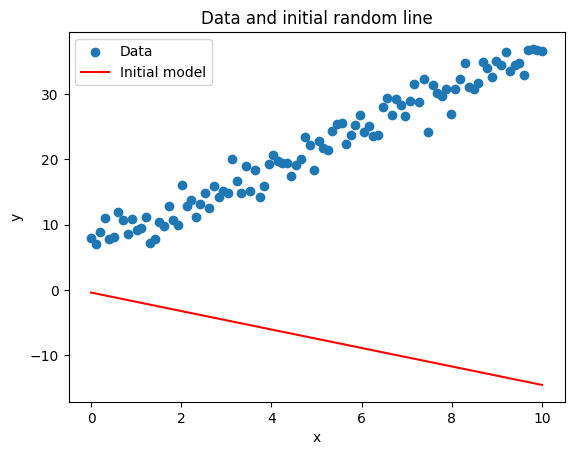

In [7]:
plt.figure()
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred_initial, color='red', label='Initial model') 
plt.xlabel('x')
plt.ylabel('y')
plt.title("Data and initial random line")
plt.legend()
plt.show()

# Define the loss (MSE)

We will copmute the Mean Squared Error (MSE) with the formula:

$$
\text{MSE} = \frac{1}{n} \sum^{n}_{i = 1} (\hat{y_{i}} - y_{i})^{2},
$$

where $y_{i}$ is the true value, $\hat{y_{i}}$ is the predicted value. This tells us on average how far the predictions are from the true $y$ values.

In [8]:
def mean_squared_error(y_true, y_pred):
    """
    Compute the Mean Squared Error between true and predicted values

    y_true: shape (n_samples, 1)
    y_pred: shape (n_samples, 1)
    """
    error = y_pred - y_true      # difference for each sample
    squared_error = error ** 2   # square elementwise
    mse = np.mean(squared_error) # average over all samples
    return mse

In [9]:
initial_loss = mean_squared_error(y, y_pred_initial)
print('Initial MSE loss:', initial_loss)

Initial MSE loss: 1028.974475954937


# Compute gradients of the loss w.r.t w and b

The gradients are:

$$
\frac{\delta \text{MSE}}{\delta w} = \frac{2}{n} X^{T} (\hat{y} - y)
$$


$$
\frac{\delta \text{MSE}}{\delta b} = \frac{2}{n} \sum^{n}_{i=1} (\hat{y_{i}} - y_{i})
$$

We will implement them with NumPy.

In [10]:
def compute_gradients(X, y_true, w, b):
    """
    Compute gradients of the MSE loss with respect to w and b.

    X: shape (n_samples, n_features)
    y_true: shape (n_samples, 1)
    w: shape (n_features, 1)
    b: shape (1,)

    Returns:
        grad_w: same shape as w
        grad_b: same shape as b
    """
    n_samples = X.shape[0]

    # 1. Compute current predictions
    y_pred = predict(X, w, b)  # shape (n_samples, 1)

    # 2. Compute error
    error = y_pred - y_true    # shape (n_samples, 1)

    # 3. Apply gradient formulas
    grad_w = (2 / n_samples) * (X.T @ error)          # shape (1, 1)
    grad_b = (2 / n_samples) * np.sum(error, axis=0)  # shape (1,)

    return grad_w, grad_b


In [11]:
grad_w, grad_b = compute_gradients(X, y, w, b)

print("grad_w:", grad_w)
print("grad_w shape:", grad_w.shape)
print("grad_b:", grad_b)
print("grad_b shape:", grad_b.shape)


grad_w: [[-368.44329314]]
grad_w shape: (1, 1)
grad_b: [-58.579612]
grad_b shape: (1,)


# One single gradient descent update

In [12]:
learning_rate = 0.01 # small step size

# compute gradients with current w and b
grad_w, grad_b = compute_gradients(X, y, w, b)


# Update parameters

w_new = w - learning_rate * grad_w
b_new = b - learning_rate * grad_b


In [13]:
y_pred_new = predict(X, w_new, b_new)
new_loss = mean_squared_error(y, y_pred_new)

print("Old loss:", initial_loss)
print("New loss:", new_loss)

Old loss: 1028.974475954937
New loss: 113.86748167849957


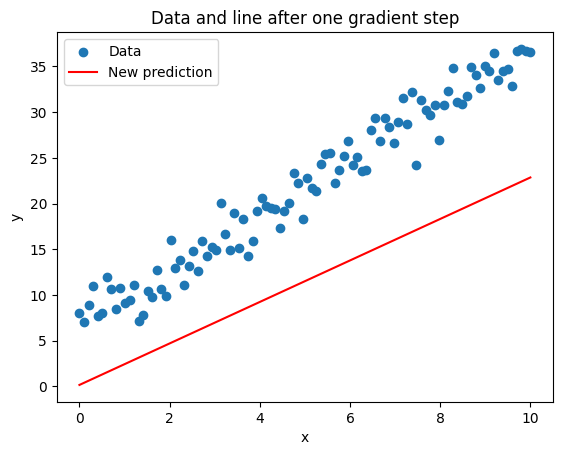

In [14]:
plt.figure()
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred_new[:,0], color='red', label='New prediction') 
plt.xlabel('x')
plt.ylabel('y')
plt.title("Data and line after one gradient step")
plt.legend()
plt.show()


In [15]:
# Hyperparamaters:
# How many times to update (n_epochs), how big each step is (learning_rate), where to start (w and b)

learning_rate = 0.01
n_epochs = 1000 # number of gradient descent steps

# Start from the current w and b (you can also reinitialise if we want)
w_gd = w.copy()
b_gd = b.copy()

loss_history = []

# The training loop

In [16]:
for epoch in range(n_epochs):
    # Predictions with current parameters
    y_pred = predict(X, w_gd, b_gd)

    # Compute loss
    loss = mean_squared_error(y, y_pred)
    loss_history.append(loss)

    # Compute gradients 
    grad_w, grad_b = compute_gradients(X, y, w_gd, b_gd)

    # Update parameters 
    w_gd = w_gd - learning_rate * grad_w
    b_gd = b_gd - learning_rate * grad_b

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss:.4f}")



Epoch 100/1000, Loss: 6.9791
Epoch 200/1000, Loss: 4.6344
Epoch 300/1000, Loss: 3.7678
Epoch 400/1000, Loss: 3.4474
Epoch 500/1000, Loss: 3.3290
Epoch 600/1000, Loss: 3.2853
Epoch 700/1000, Loss: 3.2691
Epoch 800/1000, Loss: 3.2631
Epoch 900/1000, Loss: 3.2609
Epoch 1000/1000, Loss: 3.2601


In [17]:
y_pred_final = predict(X, w_gd, b_gd)

print("Final w:", w_gd)
print("Final b:", b_gd)

final_loss = mean_squared_error(y, y_pred_final)
print("Final loss:", final_loss)


Final w: [[3.03408601]]
Final b: [6.61114825]
Final loss: 3.260093096303141


# Plot the loss over epochs

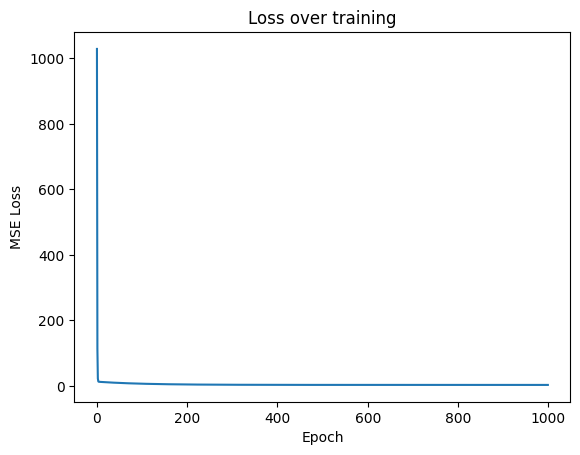

In [18]:
plt.figure()
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss over training")
plt.show()


In [19]:
y_pred_final = predict(X, w_gd, b_gd)

print("Final w:", w_gd)
print("Final b:", b_gd)

final_loss = mean_squared_error(y, y_pred_final)
print("Final loss:", final_loss)


Final w: [[3.03408601]]
Final b: [6.61114825]
Final loss: 3.260093096303141


# Plot the data and the final line

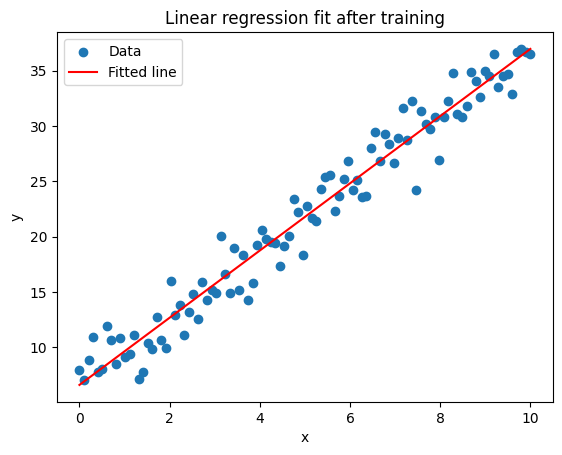

In [20]:
plt.figure()
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred_final, color="red", label="Fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear regression fit after training")
plt.legend()
plt.show()
